<a href="https://colab.research.google.com/github/RemyaRS/Feature-Engineering/blob/main/Handling_Missing_Values_using_Mean_Median_and_Mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Filter warnings
warnings.filterwarnings('ignore')

#Using google drive to import dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing dataset from google drive

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/titanic_train.csv")

#Finding details about the dataset
First five rows of dataset

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Finding number of rows and columns in a dataset

In [5]:
dataset.shape

(891, 12)

This shows that 


*   Number of rows in the dataset = 891     &
*   Number of columns in the dataset = 12




Finding names of columns

In [6]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Finding datatypes of each column data

In [7]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#Number of missing terms in each column

In [8]:
print("Number of nulls in each coloumns are :")
dataset.isnull().sum()

Number of nulls in each coloumns are :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Three column namley : Age, Cabin and Embarked are having missing values

In [9]:
new_dataset = dataset

Since Cabin data is not that important, one can drop the entire column

In [10]:
new_dataset.drop('Cabin',axis=1,inplace=True)
print("Number of nulls in each coloumns are :")
new_dataset.isnull().sum()

Number of nulls in each coloumns are :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Now the feature variable "Embarked" is having 2 missing values and its a categorical variable, missing values caan be imputed by mode

In [11]:
new_dataset['Embarked']=new_dataset['Embarked'].fillna(new_dataset['Embarked'].mode)
print("Number of nulls in each coloumns are :")
new_dataset.isnull().sum()

Number of nulls in each coloumns are :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


Through bar plot let's understand the category of people who survived compared to others

countplot() method is used to Show the counts of observations in each categorical bin using bars

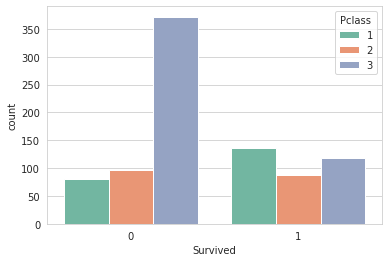

In [12]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue='Pclass', data=dataset, palette='Set2')

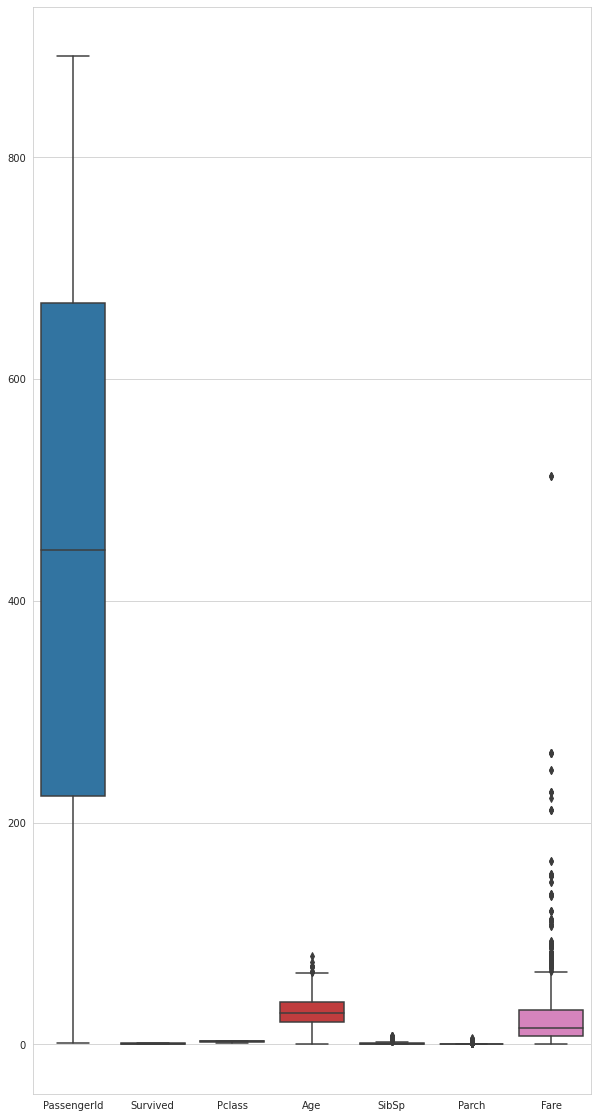

In [13]:
plt.figure(figsize=(10,20))
sns.boxplot(data=dataset)

In [14]:
#, 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


Since Age is a numerical value draw boxplot to find values that can be filled in missing places


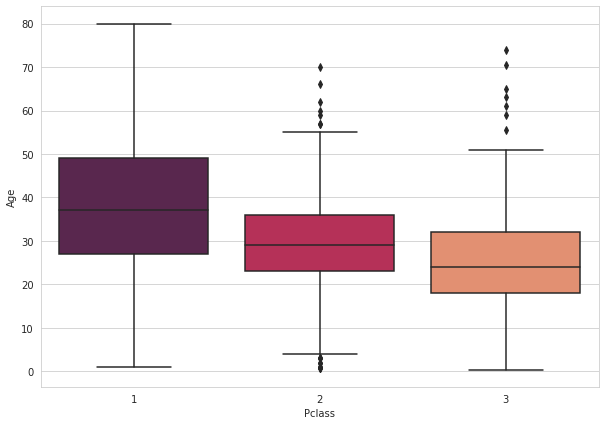

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=dataset, palette='rocket')

Since Boxplot shows outliers, impute missing values in Age variable by median of Age column instead of mean

In [16]:
new_dataset['Age'].fillna(new_dataset.groupby(["Pclass"])['Age'].transform('median'), inplace =True)

In [17]:
print("Number of nulls in each coloumns are :")
new_dataset.isnull().sum()

Number of nulls in each coloumns are :


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64